In [1]:
# used car price prediction
# weather prediction
# tour package prediction (Yaatra)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
from random import choice
p_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [4]:
df = pd.read_csv('used_cars_data.csv',index_col = 0)

In [5]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [7]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,63.71 Lakh,NaN
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [9]:
df.shape

(7253, 13)

In [10]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [11]:
for col in df.columns:
    print(f'{col}:{df[col].nunique()}')
    print(df[col].unique())
    print('-'*20)

Name:2041
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------
Location:11
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------
Year:23
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]
--------------------
Kilometers_Driven:3660
[72000 41000 46000 ... 89411 52262 72443]
--------------------
Fuel_Type:5
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------
Transmission:2
['Manual' 'Automatic']
--------------------
Owner_Type:4
['First' 'Second' 'Fourth & Above' 'Third']
--------------------
Mileage:450
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' 

In [12]:
target_col = 'Price'
cat_cols = ['Location','Fuel_Type','Transmission','Owner_Type']
num_cols = ['Kilometers_Driven','Mileage','Engine','Power','Seats','Year']
drop_cols = ['New_Price']

In [13]:
df.drop(drop_cols,axis=1,inplace=True)

In [14]:
# Missing Data
100*pd.isnull(df).sum()/len(df)

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
Price                17.013650
dtype: float64

In [15]:
# Drop the Missing Entries
# df0 = df.dropna()
# df1 = df.dropna(thresh = 11)
# df2 = df[~pd.isnull(df['Price'])]
# df.shape, df1.shape, df0.shape

for example we have total 12 columns, so it will keep only those rows, which at least have 11 number of entries to be non-null

In [16]:
# x = pd.DataFrame({
#     'a':[23,34,56,34,78,np.nan,np.nan],
#     'b':[2,4,5,6,np.nan,7,np.nan],
#     'c':[9,2,np.nan,11,np.nan,39,33],
#     'd':[3,5,7,9,2,6,2]
# })
# x
# x.dropna()
# x.dropna(thresh = 4)
# x.dropna(thresh = 3)
# x.dropna(thresh = 2)

In [17]:
# Treating the Power Data first
df['Power'] = df['Power'].apply(
    lambda x: 
        np.nan if pd.isnull(x) else (
            np.nan if 'null' in x.lower() else x
        )
)

In [18]:
# The only method has to be used here REMOVE ALL THE MISSING ENTRIES
cars = df.dropna()
cars.shape

(5872, 12)

In [19]:
cars['Mileage'] = cars['Mileage'].str.split().str.get(0).astype(float)
# cars['Mileage'].apply(lambda x: eval(x.split()[0]))

cars['Power'] = cars['Power'].str.split().str.get(0).astype(float)
cars['Engine'] = cars['Engine'].str.split().str.get(0).astype(float)

In [20]:
# Outlier Analysis
print(cars['Price'].max(),cars['Price'].min(),cars['Price'].mean(), cars['Price'])

160.0 0.44 9.603918596730246 S.No.
0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5872, dtype: float64


In [21]:
# PRICE Column
# ------------------------------------------
q1 = cars['Price'].quantile(0.25)
q2 = cars['Price'].quantile(0.5)
q3 = cars['Price'].quantile(0.75)
iqr = q3 - q1
max_lim = q3 + (iqr * 1.5)
# min_lim = q1 - (iqr * 1.5)
min_lim = 0 # since price can not be negative
print(q1,q2,q3,iqr, max_lim, min_lim)
print((cars['Price'] > max_lim).sum())

3.5175 5.75 10.0 6.4825 19.72375 0
712


In [22]:
cars['Price'][cars['Price'] > max_lim].sort_values(ascending=False).head(20)

S.No.
4079    160.00
5781    120.00
5919    100.00
1505     97.07
1974     93.67
1984     93.00
4691     90.00
5535     85.00
2095     83.96
1885     79.00
2422     79.00
2319     78.80
2907     75.00
655      75.00
3489     75.00
2659     75.00
1583     72.94
5603     72.00
418      70.99
1690     70.80
Name: Price, dtype: float64

In [23]:
# Putting Arbitrary Condition to remove some extreme outliers (not sure if it helps)
cars = cars[cars['Price']<=100]

In [24]:
# PRICE Column after removing outlier (arbitrarily)
# ------------------------------------------
q1 = cars['Price'].quantile(0.25)
q2 = cars['Price'].quantile(0.5)
q3 = cars['Price'].quantile(0.75)
iqr = q3 - q1
max_lim = q3 + (iqr * 1.5)
# min_lim = q1 - (iqr * 1.5)
min_lim = 0 # since price can not be negative
print(q1,q2,q3,iqr, max_lim, min_lim)
print((cars['Price'] > max_lim).sum())

3.5124999999999997 5.75 10.0 6.487500000000001 19.731250000000003 0
710


In [25]:
# Removing one extreme outlier
cars = cars[cars['Kilometers_Driven'] < cars['Kilometers_Driven'].max()]

# EDA - Graphical Analysis

Location
Ahmedabad     220
Bangalore     347
Chennai       475
Coimbatore    629
Delhi         544
Hyderabad     717
Jaipur        402
Kochi         645
Kolkata       521
Mumbai        775
Pune          594
Name: Location, dtype: int64


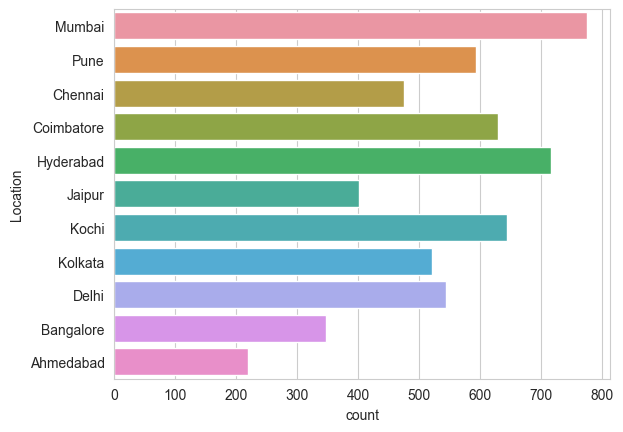

Fuel_Type
CNG         55
Diesel    3150
LPG         10
Petrol    2654
Name: Fuel_Type, dtype: int64


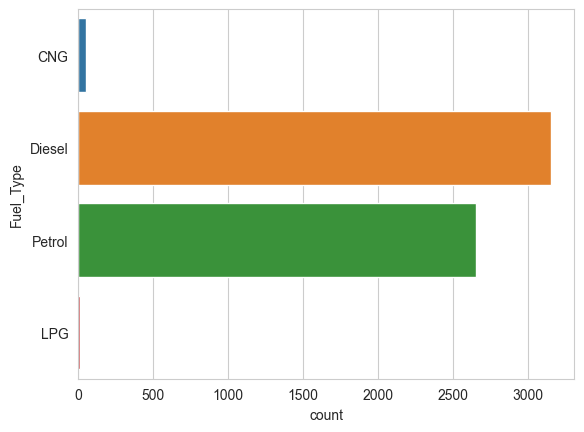

Transmission
Automatic    1699
Manual       4170
Name: Transmission, dtype: int64


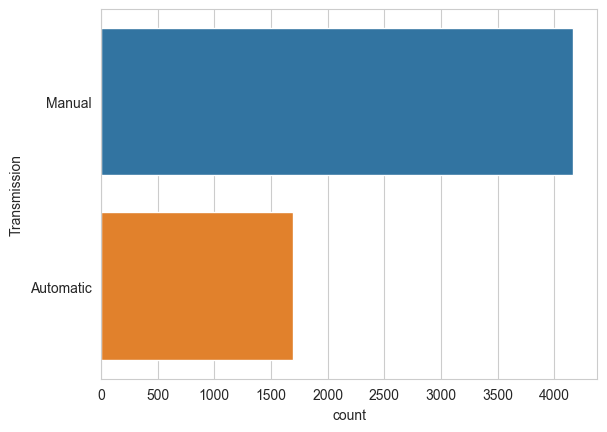

Owner_Type
First             4837
Fourth & Above       7
Second             925
Third              100
Name: Owner_Type, dtype: int64


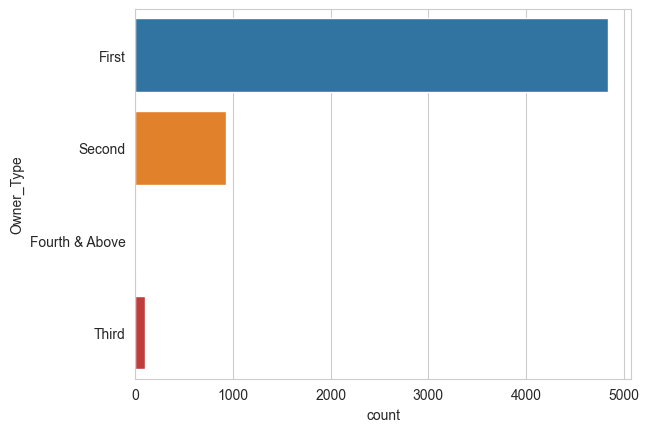

Kilometers_Driven


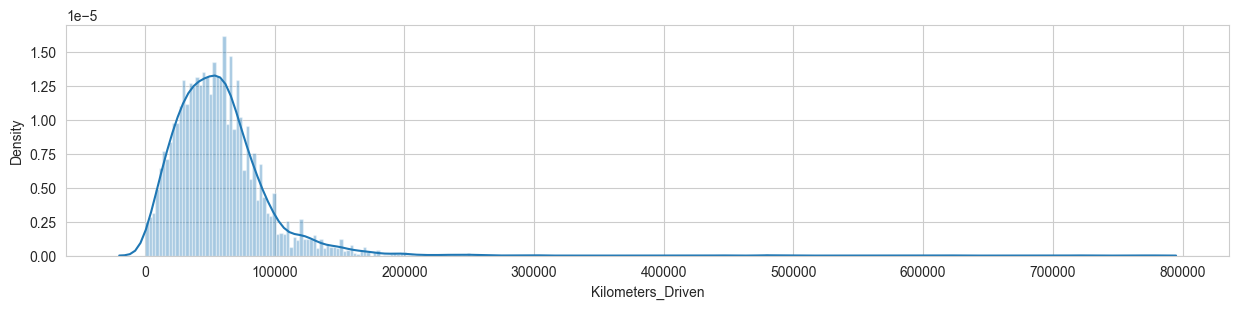

Mileage


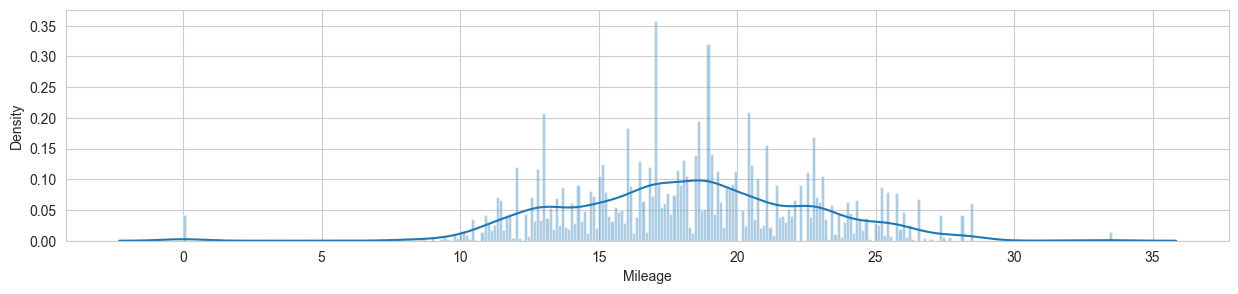

Engine


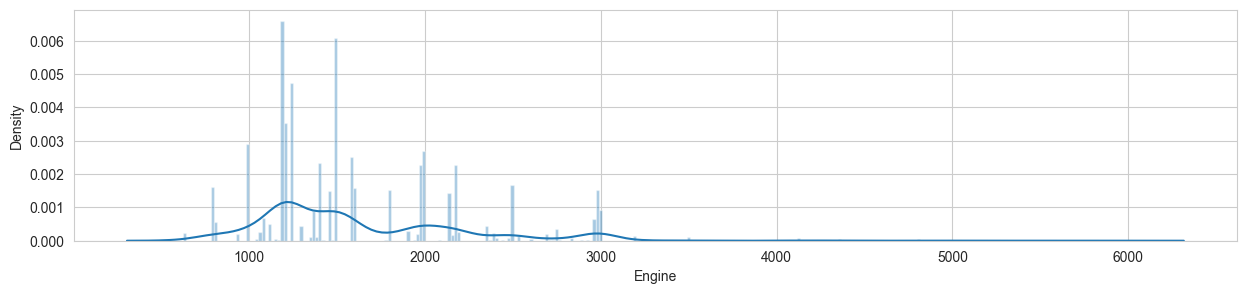

Power


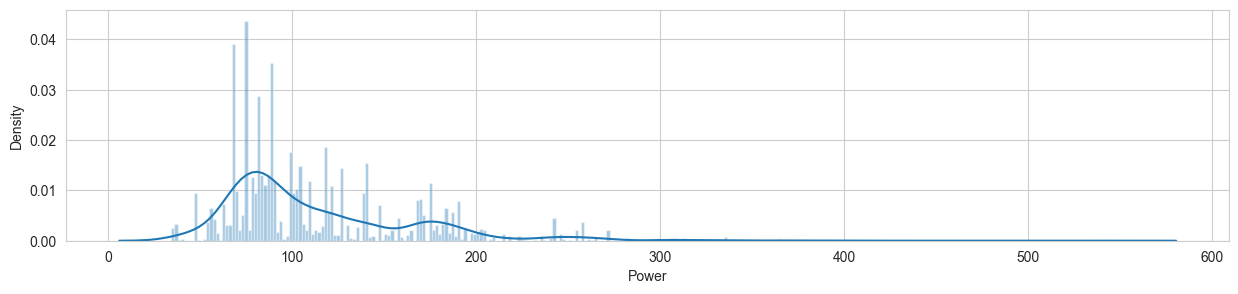

Seats


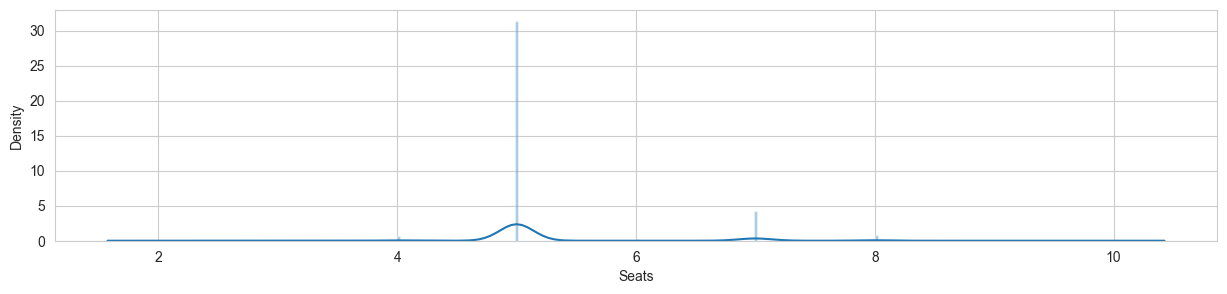

Year


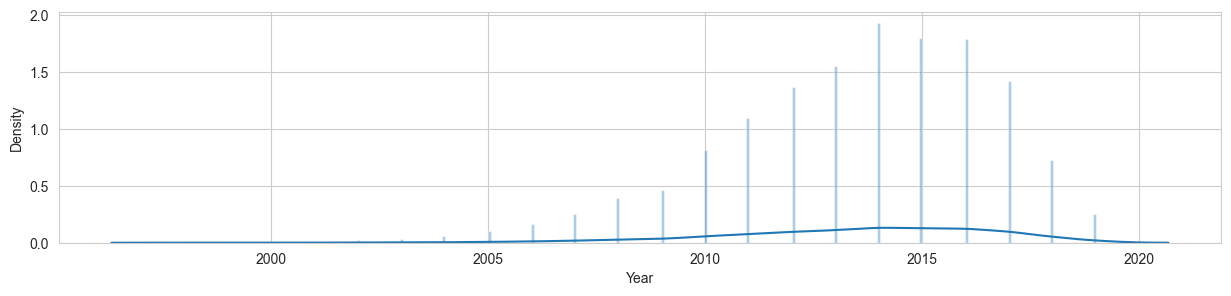

Location


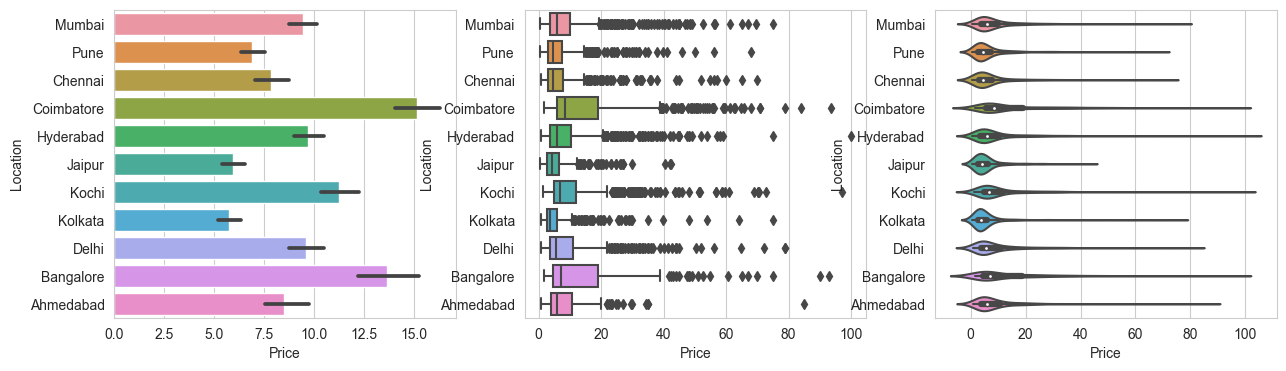

Fuel_Type


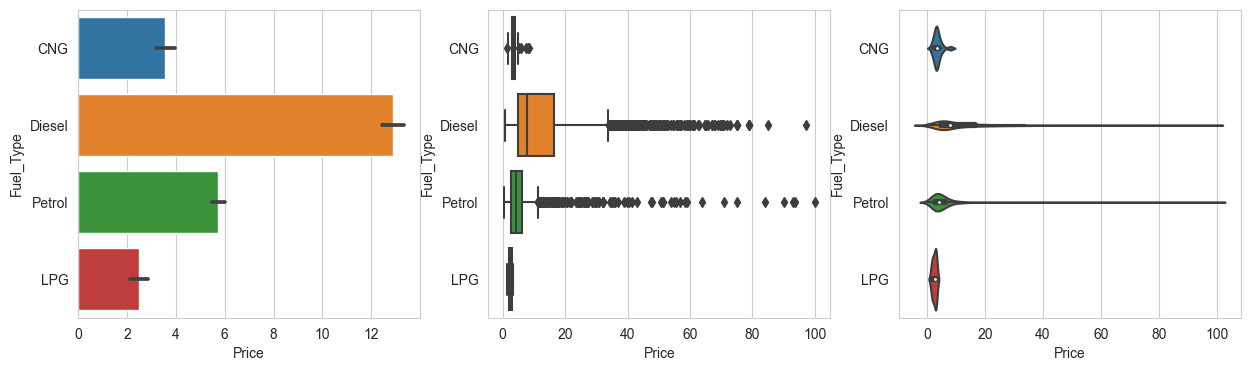

Transmission


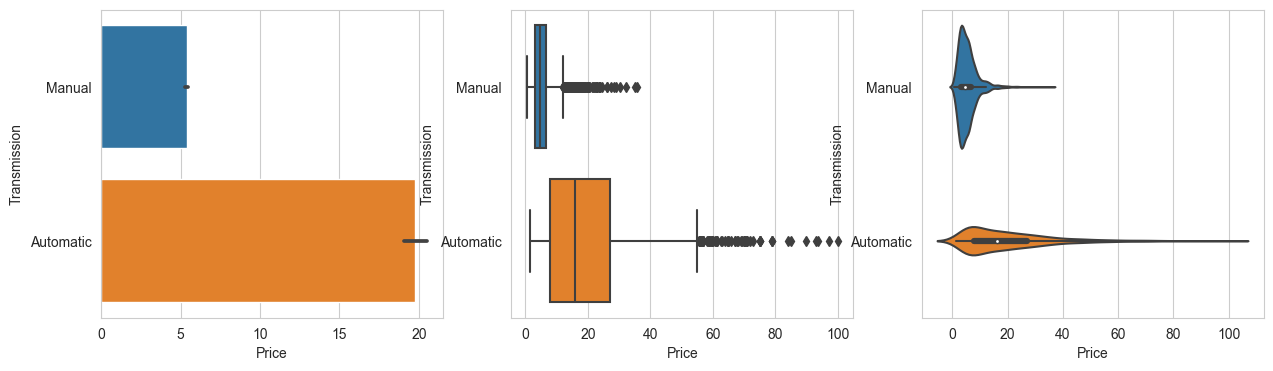

Owner_Type


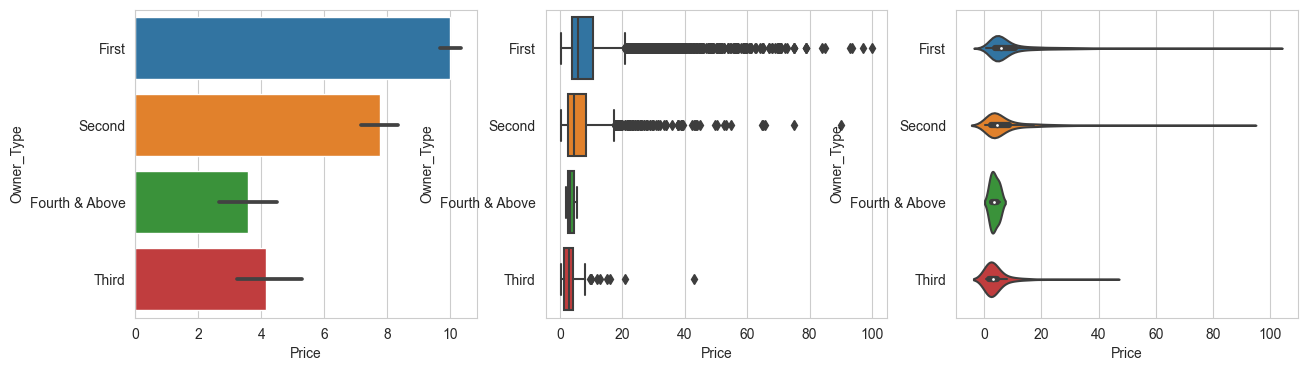

Kilometers_Driven


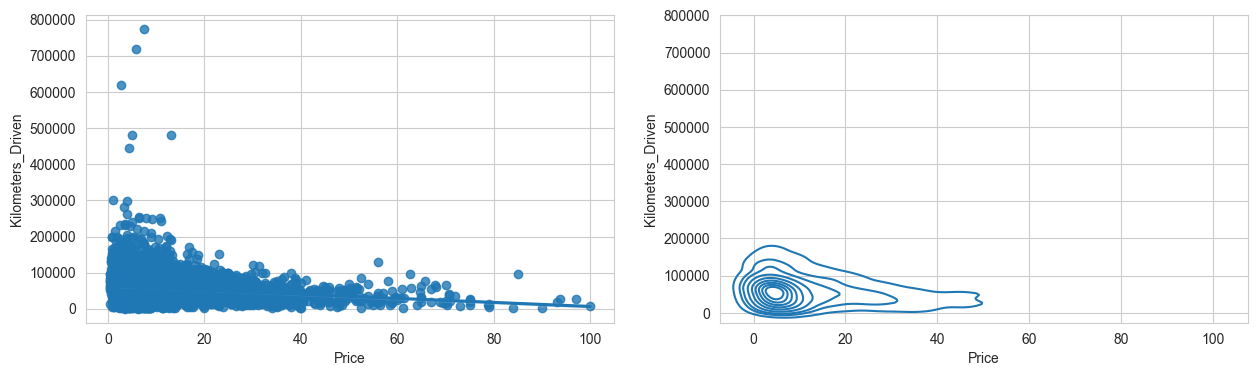

Mileage


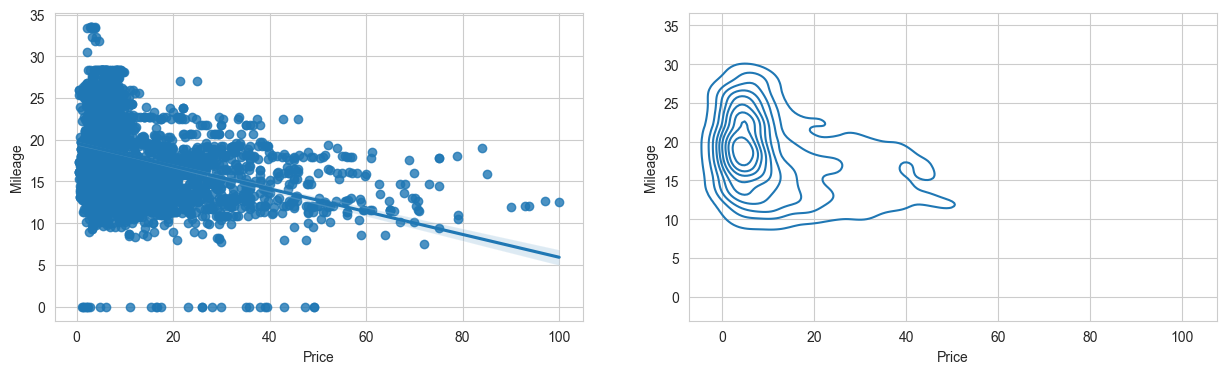

Engine


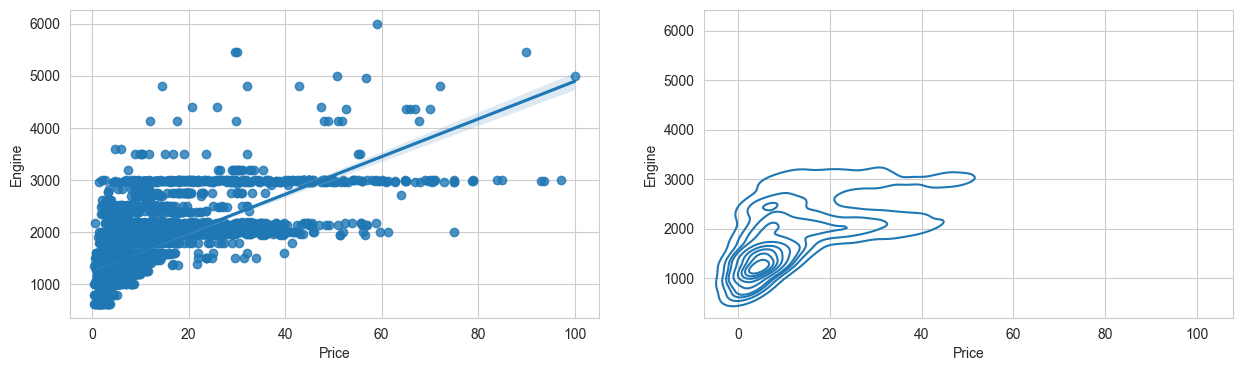

Power


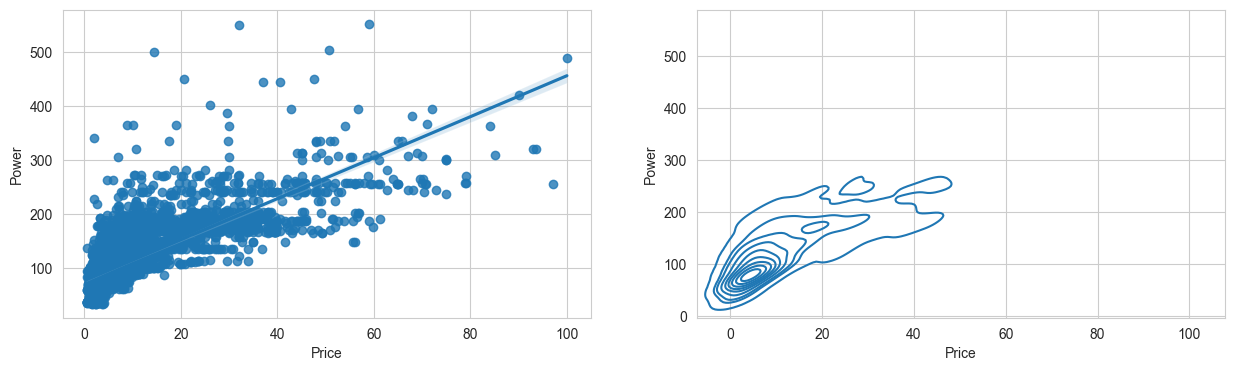

Seats


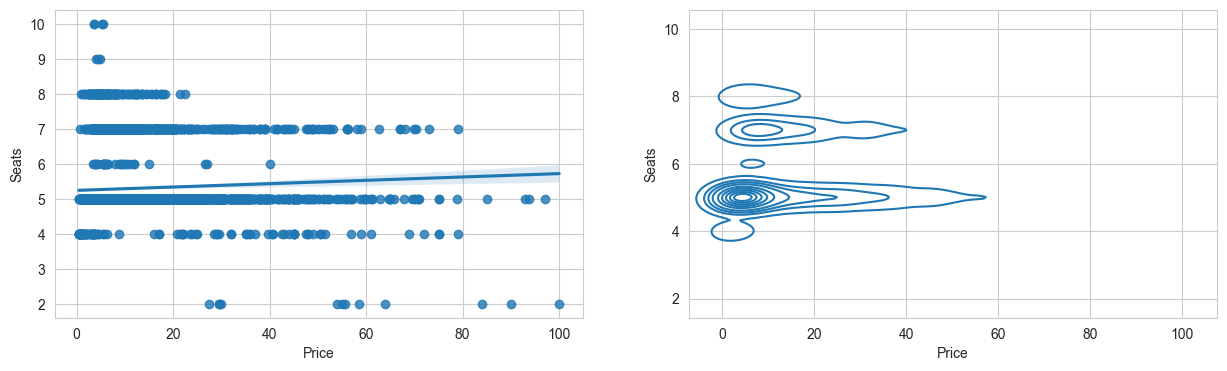

Year


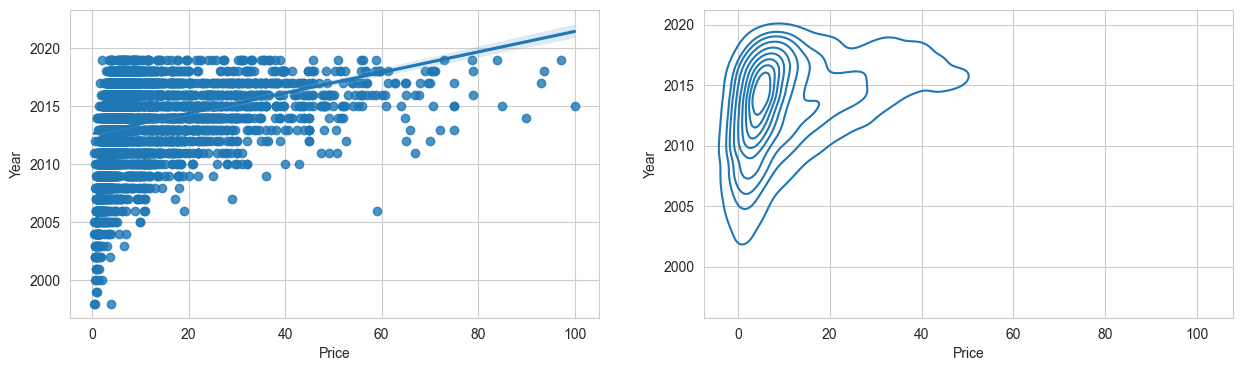

In [26]:
# Univariate Analysis
def cat_analyze(col):
    print(col)
    print(cars[col].value_counts().sort_index())
    sns.countplot(data = cars, y=col)
    plt.show()
for col in cat_cols:
    cat_analyze(col)

def num_analyze(col):
    print(col)
    fig = plt.figure(figsize=(15,3))
    sns.distplot(cars[col],bins = 300)
    plt.show()
for col in num_cols:
    num_analyze(col)

# Bivariate Analysis
def cat_bivariate(col):
    print(col)        
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)    
    sns.barplot(data=cars,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=cars,x=target_col, y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=cars,x=target_col, y=col)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)


def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)    
    sns.regplot(data=cars,x=target_col,y=col)
    plt.subplot(1,2,2)
    sns.kdeplot(data=cars,x=target_col, y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)

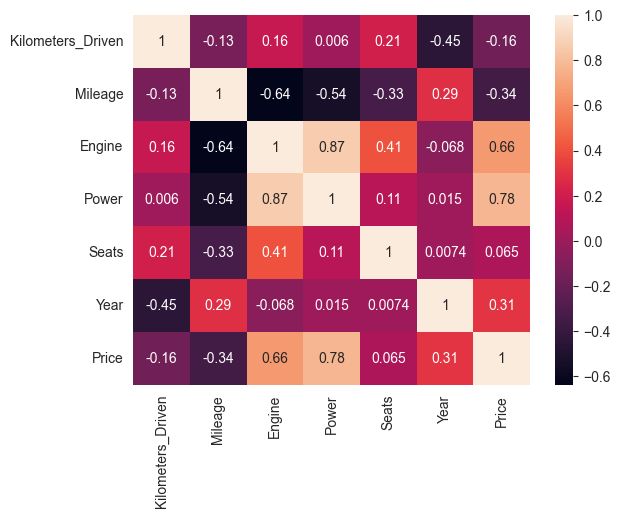

In [27]:
sns.heatmap(cars[num_cols + [target_col]].corr(),annot=True)
plt.show()

In [28]:
# based on analysis
selected_cols = ['Power','Year','Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [29]:
cars_df = cars[selected_cols + [target_col]]
cars_df.head()

,Power,Year,Location,Fuel_Type,Transmission,Owner_Type,Price
S.No.,,,,,,,
0,58.16,2010,Mumbai,CNG,Manual,First,1.75
1,126.20,2015,Pune,Diesel,Manual,First,12.50
2,88.70,2011,Chennai,Petrol,Manual,First,4.50
3,88.76,2012,Chennai,Diesel,Manual,First,6.00
4,140.80,2013,Coimbatore,Diesel,Automatic,Second,17.74


In [30]:
cars_dummies = pd.get_dummies(cars_df).drop('Transmission_Automatic',axis=1)

In [31]:
features = cars_dummies.drop('Price',axis=1)
target = cars_dummies['Price']

In [32]:
from sklearn.preprocessing import PolynomialFeatures
feats_poly3 = PolynomialFeatures(degree=3).fit_transform(features)

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features, target, test_size=0.25, random_state=101)
xtrainp,xtestp,ytrainp,ytestp = train_test_split(feats_poly3, target, test_size=0.25, random_state=101)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_linear = LinearRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)
model_rf = RandomForestRegressor().fit(xtrain,ytrain)
model_poly3 = LinearRegression().fit(xtrainp,ytrainp)

print('Linear Model:', round(100*model_linear.score(xtest,ytest)),'%')
print('DT Model:', round(100*model_dt.score(xtest,ytest)),'%')
print('RF Model:', round(100*model_rf.score(xtest,ytest)),'%')
print('Polynomial Deg3 Model:', round(100*model_poly3.score(xtrainp,ytrainp)),'%')

Linear Model: 71 %
DT Model: 83 %
RF Model: 90 %
Polynomial Deg3 Model: 88 %


In [34]:
print('Linear Model (Training):', round(100*model_linear.score(xtrain,ytrain)),'%')
print('DT Model (Training):', round(100*model_dt.score(xtrain,ytrain)),'%')
print('RF Model (Training):', round(100*model_rf.score(xtrain,ytrain)),'%')

Linear Model (Training): 72 %
DT Model (Training): 100 %
RF Model (Training): 98 %


In [35]:
# Elbow Method

scores = []
for i in range(1,5):    
    feats_i = PolynomialFeatures(degree=i).fit_transform(features)
    model_i = LinearRegression().fit(feats_i,target)
    scores.append(100 - round(100*model_i.score(feats_i,target)))

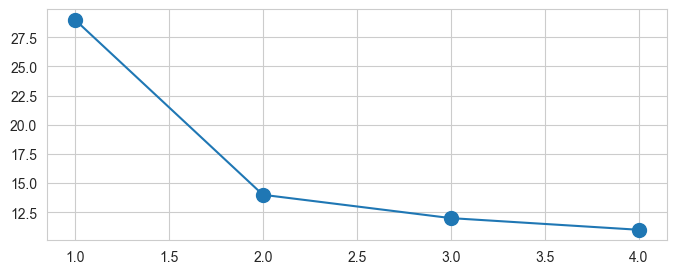

In [36]:
plt.figure(figsize=(8,3))
plt.plot(range(1,5), scores, marker='o', markersize=10)
plt.grid(True)
plt.show()


In [37]:
imp_rf = pd.DataFrame(model_rf.feature_importances_, columns=['Importance'],index = xtrain.columns)

In [38]:
imp_rf.sort_values(by='Importance',ascending=False)

,Importance
Power,7.523713e-01
Year,1.819041e-01
Transmission_Manual,1.202189e-02
Location_Hyderabad,6.525040e-03
Location_Kochi,5.587795e-03
Location_Bangalore,5.387261e-03
Fuel_Type_Diesel,4.928328e-03
Location_Coimbatore,4.874692e-03
Location_Mumbai,4.175255e-03
Location_Delhi,4.089703e-03


In [39]:
imp_cols = ['Power','Year','Transmission_Manual']

In [40]:
pd.to_pickle(model_rf,'CarPricePredictor.pickle')

In [41]:
imp_cols = ['Power','Year','Transmission_Manual']
model_rf_imp = RandomForestRegressor().fit(xtrain[imp_cols],ytrain)
print('Testing Score:',model_rf_imp.score(xtest[imp_cols],ytest)*100)
print('Training Score:',model_rf_imp.score(xtrain[imp_cols],ytrain)*100)
pd.to_pickle(model_rf_imp, 'CarPricePredictor.pickle')

Testing Score: 88.65284397964216
Training Score: 96.42540403480548


In [42]:
xtrain.columns

Index(['Power', 'Year', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [43]:
import pandas as pd

In [44]:
m = pd.read_pickle('CarPricePredictor.pickle')